# Digit Recognition by using Neaural Networks

## Abstract: 

This project is centered around the application of neural network methodologies to recognize digits. The notebook outlines a step-by-step process, beginning with the loading of test data and culminating in the precise prediction of digits within this dataset. Throughout the analysis, the Mnist dataset serves as the cornerstone, facilitating all actions and computations involved

### What is Neaural Netowrks? 

Neural networks are computer systems inspired by the brain's structure. They process information through interconnected nodes, adjusting connections to learn patterns and make predictions from data. Used widely in AI, they excel in tasks like image recognition, language processing, and data analysis.

### What is MNIST Data Set?

The MNIST dataset is a widely used collection of handwritten digits used for training various image processing systems in machine learning. It consists of 28x28 pixel grayscale images of handwritten digits (0 to 9), making it a standard benchmark for developing and testing algorithms in image classification and machine learning tasks. MNIST's popularity stems from its simplicity and applicability in training neural networks and other classification algorithms.

#### Importing Necessary Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

#### Importing MNIST Data Set from Keras datasets 

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#### Lets see how the data looks like

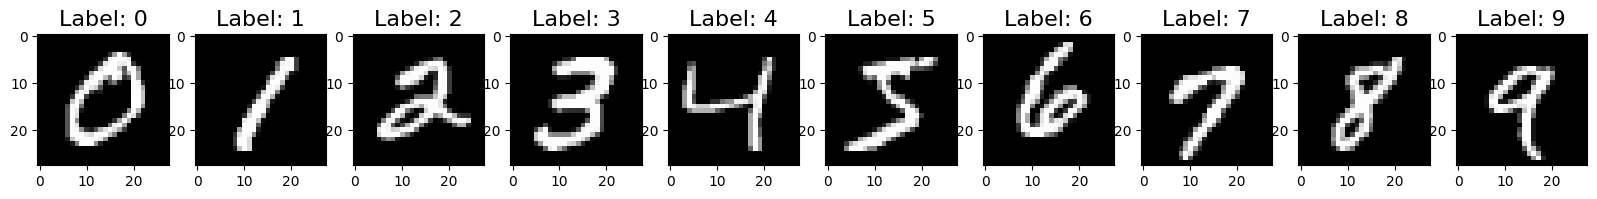

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [5]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#### Why is the Label converted into a matrix?


Labels are converted into matrix where position of value 1 in the row determines tje label number. This helps in excluding decimal values in test data learning.

#### Prepareing Data

In [8]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


#### Model Creation - Fully Connected Neural Network

In [10]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Training Data

In [11]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.8188
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 0.2315 - accuracy: 0.9337
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1672 - accuracy: 0.9514
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1333 - accuracy: 0.9604
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1120 - accuracy: 0.9665
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.9720
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0805 - accuracy: 0.9757
Epoch 8/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0708 - accuracy: 0.9783
Epoch 9/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 0.9812
Epoch 10/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9835

#### We can observe that the loss going down and accuracy increasing for every iteration, which is good as long as its not overfitting.

#### Now we introduce the test data and check for accuracy. This is one of the important steo, which always have to make sense for the model to be working.

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 408us/step - loss: 0.0762 - accuracy: 0.9764
Test Loss: 0.07624361664056778, Test Accuracy: 0.9764000177383423


In [13]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 0s 377us/step
[[3.28305532e-06 4.69309543e-06 9.23004118e-05 ... 9.99441803e-01
  7.98543988e-06 4.47540988e-05]
 [1.31242599e-08 1.95454713e-03 9.97967184e-01 ... 2.06016307e-06
  9.15477358e-06 2.91820879e-09]
 [9.55782752e-07 9.98577833e-01 1.74984132e-04 ... 6.30456721e-04
  1.89089857e-04 5.05914177e-05]
 ...
 [2.25658745e-08 6.49954224e-09 1.11694642e-09 ... 1.55276448e-05
  2.70001550e-07 7.12702922e-06]
 [1.14627809e-08 5.56522764e-07 1.21884547e-09 ... 1.48222608e-08
  2.28658158e-04 1.02203055e-08]
 [8.75774120e-08 7.54856089e-09 2.10741646e-09 ... 9.43046974e-10
  4.31637526e-09 1.01579405e-10]]
[7 2 1 ... 4 5 6]


#### Lets see how we use this model and predict on some sample image

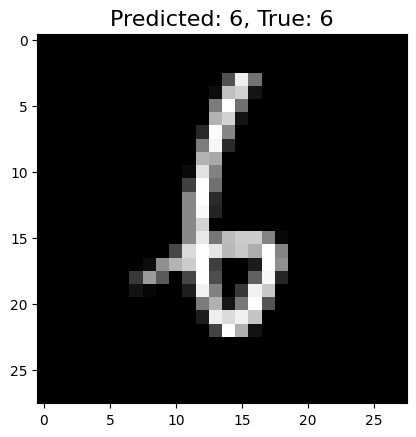

In [14]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

#### The above tells us that the model implemented on image which has 6 is predicted to be 6 which is true

### Confusion Matrix for Validation

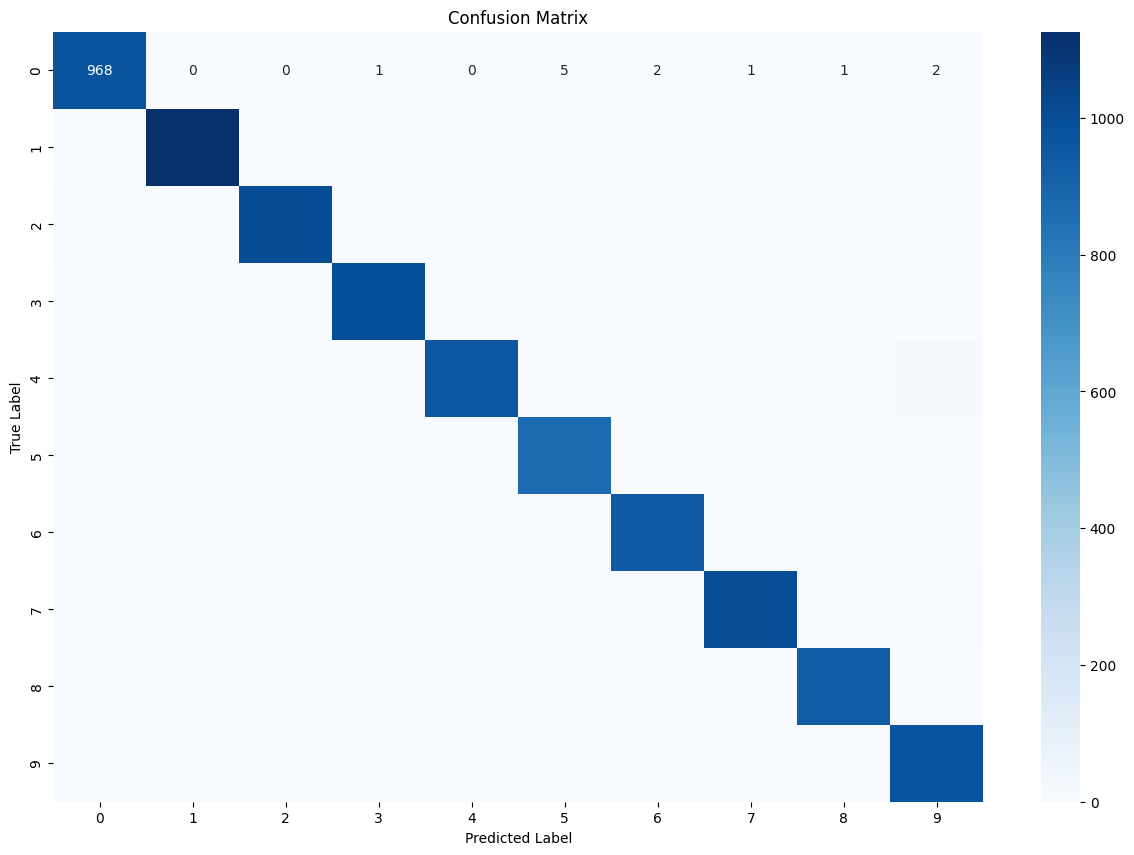

In [15]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

#### We have oredicted label on the x axis and true label on the y.
#### If you observe the first row, It says 986 prediction of zero from the dataset is predicted as zero which is correct but it was also predicted and 2 teice, 4 once, 8 twice and so on

### Investigate Some Errors

In [16]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [17]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

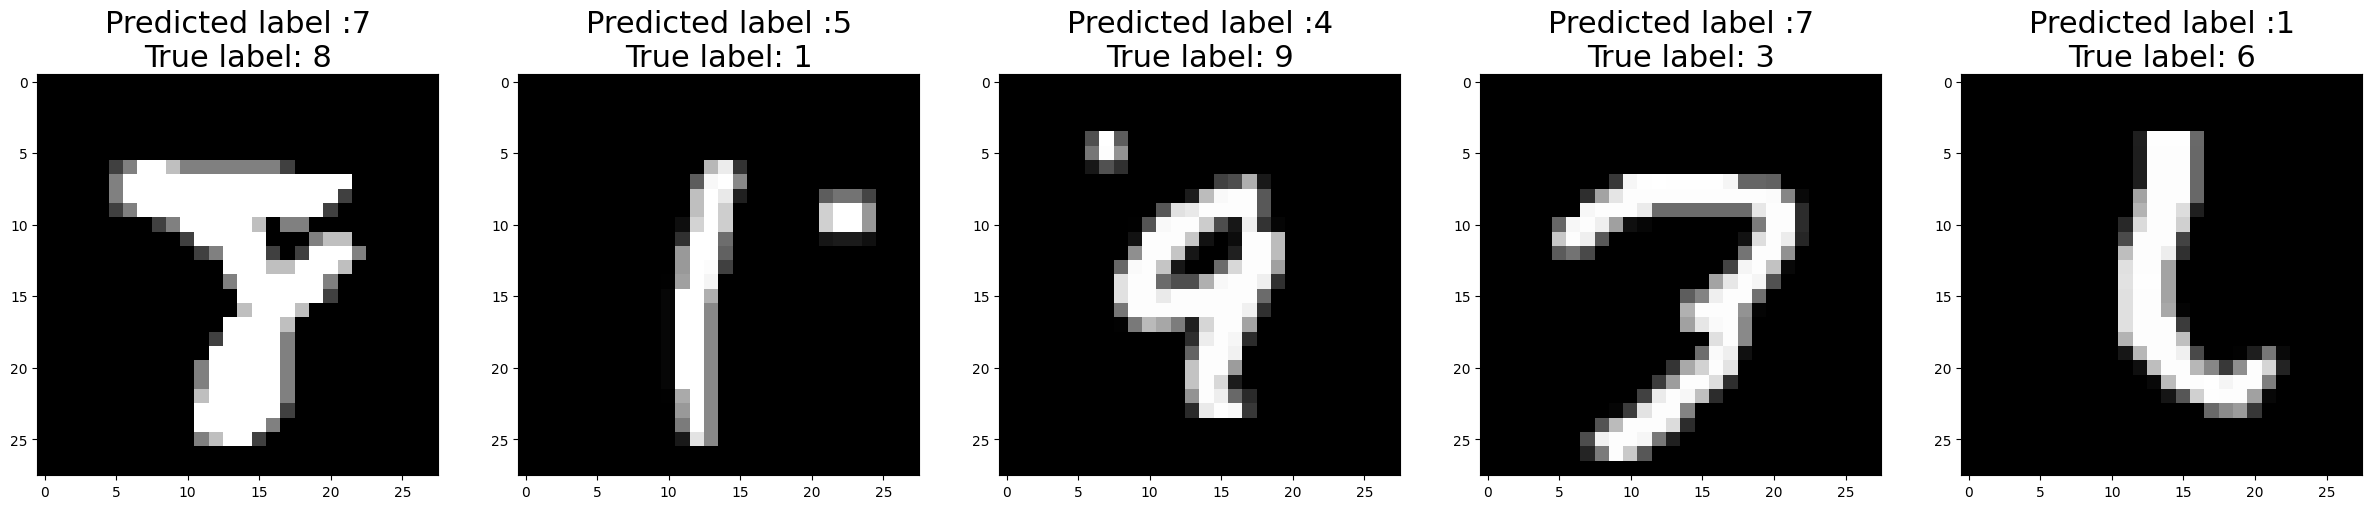

In [18]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)

#### In conclusion, our neural network model demonstrates high accuracy, surpassing 95%, when tested on the MNIST dataset. This signifies its proficiency in accurately recognizing and classifying handwritten digits, showcasing its effectiveness in this specific task.